<a href="https://colab.research.google.com/github/Pravallikavyas/FILE-HANDLING-AND-REGULAR-EXPRESSIONS/blob/main/sunbase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

In [2]:
df=pd.read_excel('/content/customer_churn_large_dataset.xlsx')

**Data Preprocessing**

In [3]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [4]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [5]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [6]:
df.shape

(100000, 9)

In [7]:
df=df.drop_duplicates()

In [8]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [9]:
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(96.0, -8.0)

In [10]:
df['Age']=df['Age'].clip(-13.5,38.5)

In [11]:
iqr = df['Subscription_Length_Months'].quantile(0.75) - df['Subscription_Length_Months'].quantile(0.25)
upper_threshold = df['Subscription_Length_Months'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Subscription_Length_Months'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(38.5, -13.5)

In [12]:
df['Subscription_Length_Months']=df['Subscription_Length_Months'].clip(-13.5,38.5)

In [13]:
iqr = df['Monthly_Bill'].quantile(0.75) - df['Monthly_Bill'].quantile(0.25)
upper_threshold = df['Monthly_Bill'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Monthly_Bill'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(135.29000000000002, -5.1100000000000065)

In [14]:
df['Monthly_Bill']=df['Monthly_Bill'].clip(-5.11,135.29)

In [15]:
iqr = df['Total_Usage_GB'].quantile(0.75) - df['Total_Usage_GB'].quantile(0.25)
upper_threshold = df['Total_Usage_GB'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Total_Usage_GB'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(726.0, -178.0)

In [16]:
df['Total_Usage_GB']=df['Total_Usage_GB'].clip(-178,726)

In [17]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

<Axes: ylabel='Location'>

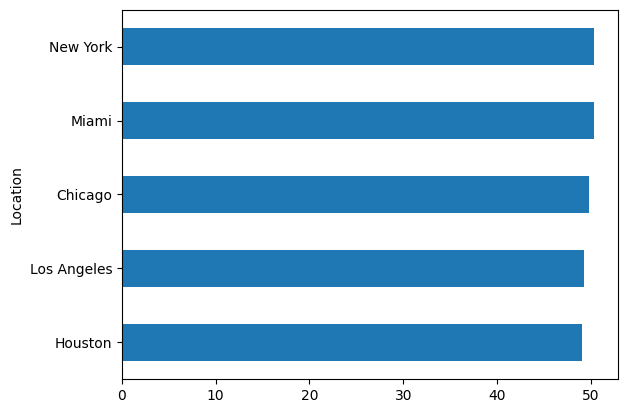

In [18]:
(df.groupby("Location")["Churn"].mean()*100).sort_values( ).plot(kind="barh")

In [19]:
df['Location']=df['Location'].map({'Los Angeles':2,'Houston':1,'New York':5,'Chicago':3,'Miami':4})

In [20]:
df.drop(["CustomerID","Name"],axis=1,inplace=True)

In [21]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,38.5,1,2,17,73.36,236,0
1,38.5,0,5,1,48.76,172,0
2,24.0,0,2,5,85.47,460,0
3,36.0,0,4,3,97.94,297,1
4,38.5,0,4,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33.0,1,1,23,55.13,226,1
99996,38.5,0,5,19,61.65,351,0
99997,38.5,1,3,17,96.11,251,1
99998,38.5,0,5,20,49.25,434,1


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

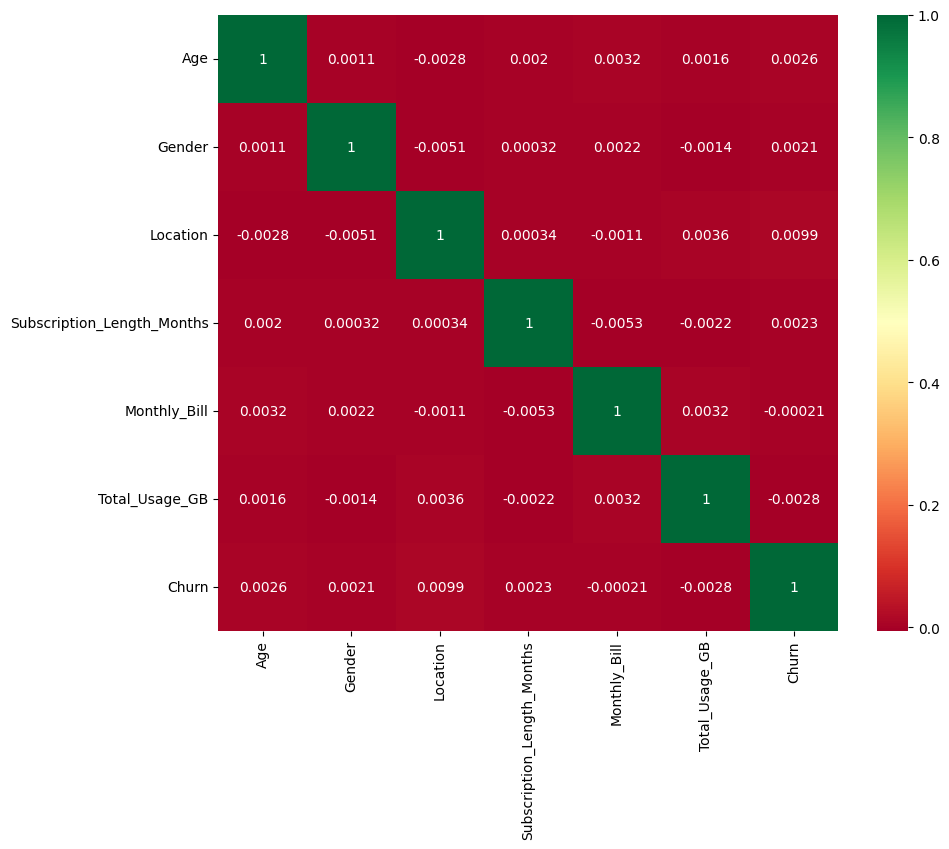

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

**Checking if its imbalanced dataset or not**

Class 0: 50221
Class 1: 49779
Proportion of class 0 is  50.22 %


<Axes: title={'center': 'Count(target)'}>

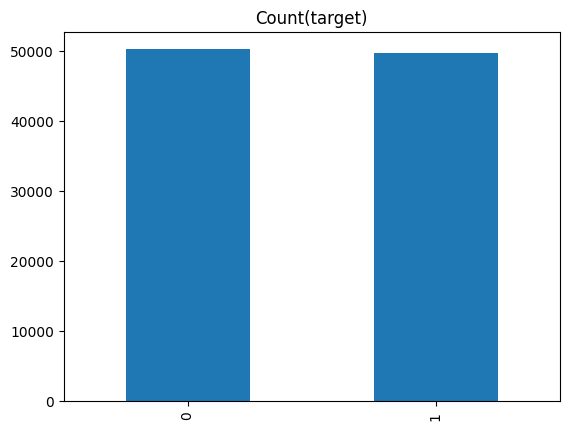

In [26]:
target_count=df['Churn'].value_counts()
print('Class 0:',target_count[0])
print('Class 1:',target_count[1])
print('Proportion of class 0 is ',round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
target_count.plot(kind='bar', title='Count(target)')


**Splitting the dataset**

In [27]:
X = df[['Gender','Age','Location','Subscription_Length_Months','Total_Usage_GB']].values
y = df['Churn'].values
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=7)

In [28]:
X_train.shape

(80000, 5)

In [29]:
X_test.shape

(20000, 5)

**Scaling**

In [30]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [32]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
import collections,numpy
c1=collections.Counter(y_pred)
c1

Counter({0: 14239, 1: 5761})

In [34]:
logistic_regression.predict_proba(X_test)

array([[0.51112349, 0.48887651],
       [0.50139628, 0.49860372],
       [0.49851486, 0.50148514],
       ...,
       [0.5137319 , 0.4862681 ],
       [0.50589298, 0.49410702],
       [0.50270426, 0.49729574]])

In [35]:
logistic_regression.coef_


array([[ 0.00466095,  0.00233792,  0.01821931,  0.00807608, -0.00497   ]])

In [36]:
logistic_regression.intercept_

array([-0.01335169])

In [37]:
!pip install scikit-plot

In [38]:
import scikitplot as skplt

In [39]:
from sklearn.metrics import roc_auc_score
y_train_pred=logistic_regression.predict_proba(X_train)
train_accuracy = roc_auc_score(y_train,y_train_pred[:,-1])
print("Auroc score for train data is:",train_accuracy)

Auroc score for train data is: 0.5057701536553025


In [40]:
print("Auroc Score for test data is:",roc_auc_score(y_test,logistic_regression.predict_proba(X_test)[:, 1]))

Auroc Score for test data is: 0.5077364487032545


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

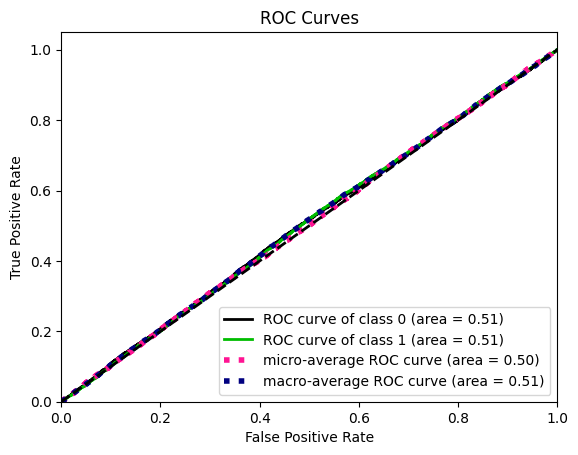

In [41]:
skplt.metrics.plot_roc(y_test,logistic_regression.predict_proba(X_test))

**K-nn classification**

In [42]:
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [43]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train)," cv score : ",np.mean(cross_val_score(knn,X_train,y_train,cv=10)))

K value  :  1  train score :  0.9393625  cv score :  0.49556249999999996
K value  :  2  train score :  0.7436  cv score :  0.4982375
K value  :  3  train score :  0.748375  cv score :  0.498725
K value  :  4  train score :  0.6858  cv score :  0.49987499999999996
K value  :  5  train score :  0.6871375  cv score :  0.4970125
K value  :  6  train score :  0.6535875  cv score :  0.49960000000000004
K value  :  7  train score :  0.651925  cv score :  0.49868749999999995
K value  :  8  train score :  0.634175  cv score :  0.49946250000000003
K value  :  9  train score :  0.6334375  cv score :  0.49868750000000006
K value  :  10  train score :  0.6208  cv score :  0.49748749999999997
K value  :  20  train score :  0.5883625  cv score :  0.5012375
K value  :  30  train score :  0.5736625  cv score :  0.49978749999999994
K value  :  40  train score :  0.5612375  cv score :  0.5007999999999999
K value  :  50  train score :  0.5565625  cv score :  0.49906249999999996


In [44]:
knn= KNeighborsClassifier(1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_train_pred=knn.predict_proba(X_train)
train_accuracy = roc_auc_score(y_train,y_train_pred[:,-1])
print("AUROC score for train data is:",train_accuracy)
print("AUROC score for test data is : ",roc_auc_score(y_test,knn.predict_proba(X_test)[:, 1]))

AUROC score for train data is: 0.9393607159913016
AUROC score for test data is :  0.4986427512806171


In [45]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

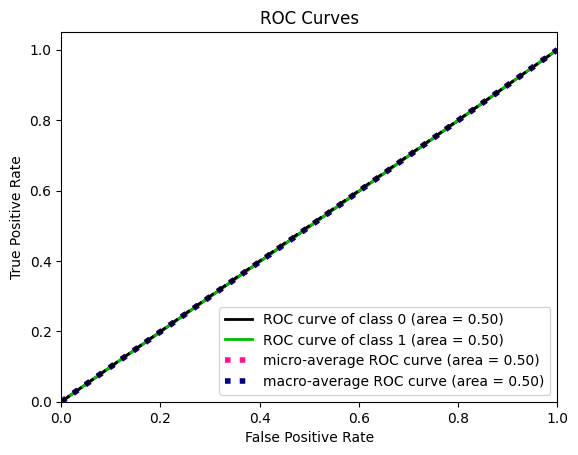

In [46]:
skplt.metrics.plot_roc(y_test,knn.predict_proba(X_test))

In [47]:
import collections,numpy
c2=collections.Counter(y_pred)
c2

Counter({1: 9814, 0: 10186})

**Decision Tree Classifier**

In [48]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train,y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt,X_train,y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth," Training Accuracy : ", trainAccuracy," Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.5033375  Cross val score :  0.5022000000000001
Depth  :  2  Training Accuracy :  0.504  Cross val score :  0.5001
Depth  :  3  Training Accuracy :  0.5040625  Cross val score :  0.499875
Depth  :  4  Training Accuracy :  0.5081  Cross val score :  0.500025
Depth  :  5  Training Accuracy :  0.5086875  Cross val score :  0.5008125
Depth  :  6  Training Accuracy :  0.5117125  Cross val score :  0.5013000000000001
Depth  :  7  Training Accuracy :  0.515075  Cross val score :  0.49989999999999996
Depth  :  8  Training Accuracy :  0.5200125  Cross val score :  0.5014375
Depth  :  9  Training Accuracy :  0.526075  Cross val score :  0.5016
Depth  :  10  Training Accuracy :  0.533025  Cross val score :  0.50065
Depth  :  20  Training Accuracy :  0.7009  Cross val score :  0.49689999999999995


In [49]:
dt=DecisionTreeClassifier(max_depth=20)
dt.fit(X_train,y_train)
y_train_pred=dt.predict_proba(X_train)
train_accuracy = roc_auc_score(y_train,y_train_pred[:,-1])
print("AUROC on train data is:",train_accuracy)
print("AUROC on the sampled dataset : ",roc_auc_score(y_test,dt.predict_proba(X_test)[:, 1]))

AUROC on train data is: 0.809153109197501
AUROC on the sampled dataset :  0.4979679070009122


In [50]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [51]:
import collections,numpy
c3=collections.Counter(y_pred)
c3

Counter({1: 9179, 0: 10821})

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

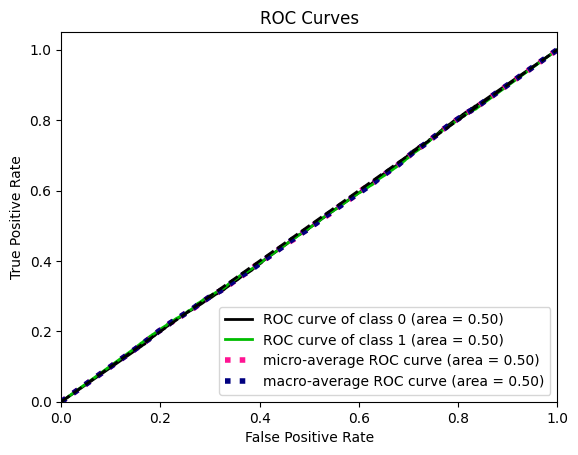

In [52]:
skplt.metrics.plot_roc(y_test,dt.predict_proba(X_test))

**Random Forest Classifier**

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion="entropy")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [54]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [55]:
import collections,numpy
c3=collections.Counter(y_pred)
c3

Counter({1: 9804, 0: 10196})

In [56]:
y_train_pred=classifier.predict_proba(X_train)
train_accuracy = roc_auc_score(y_train,y_train_pred[:,-1])
print("AUROC on the train data is:",train_accuracy)

AUROC on the train data is: 0.9920362351694807


In [57]:
print( "AUROC on the test data is : ",roc_auc_score( y_test,classifier.predict_proba(X_test)[:, 1]))

AUROC on the test data is :  0.4999000728855423


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

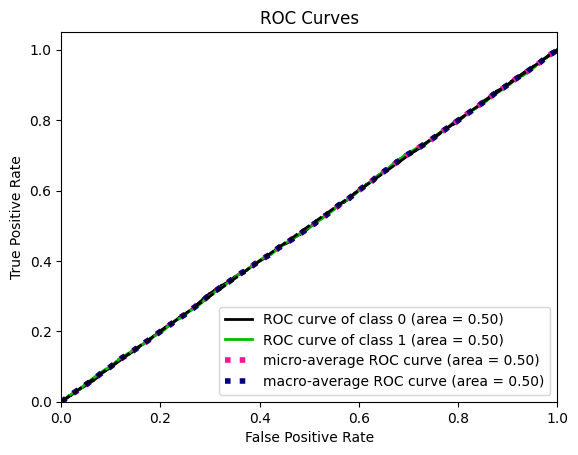

In [58]:
skplt.metrics.plot_roc(y_test,classifier.predict_proba(X_test))

**Bootstrap Aggregation**

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=1,random_state=1),n_estimators=100)
model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
                  n_estimators=100)

In [60]:
y_train_pred=model.predict_proba(X_train)
train_accuracy = roc_auc_score(y_train,y_train_pred[:,-1])
print("AUROC on the train data is:",train_accuracy)

AUROC on the train data is: 0.5086710419686943


In [61]:
print( "AUROC on the test data is : ",roc_auc_score(y_test,model.predict_proba(X_test)[:, 1]))

AUROC on the test data is :  0.5051354386658822


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

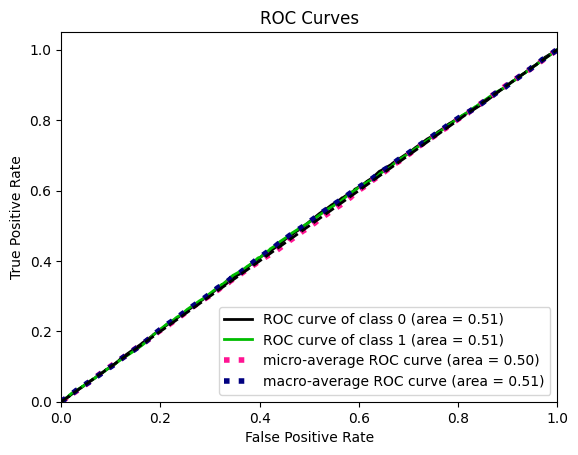

In [62]:
skplt.metrics.plot_roc(y_test,model.predict_proba(X_test))

**XGBoost Algorithm**

In [63]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100,verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model
  print("Learning rate : ", lr," Cross-Val score : ",np.mean(cross_val_score(model,X_test,y_test,cv=10)))

Learning rate :  0.01  Cross-Val score :  0.5004
Learning rate :  0.02  Cross-Val score :  0.49404999999999993
Learning rate :  0.03  Cross-Val score :  0.4928
Learning rate :  0.04  Cross-Val score :  0.492
Learning rate :  0.05  Cross-Val score :  0.4936
Learning rate :  0.1  Cross-Val score :  0.49239999999999995
Learning rate :  0.11  Cross-Val score :  0.50005
Learning rate :  0.12  Cross-Val score :  0.49124999999999996
Learning rate :  0.13  Cross-Val score :  0.49684999999999996
Learning rate :  0.14  Cross-Val score :  0.49415
Learning rate :  0.15  Cross-Val score :  0.49429999999999996
Learning rate :  0.2  Cross-Val score :  0.49524999999999997
Learning rate :  0.5  Cross-Val score :  0.5047499999999999
Learning rate :  0.7  Cross-Val score :  0.5022
Learning rate :  1  Cross-Val score :  0.50265


In [64]:
from sklearn.metrics import roc_curve,roc_auc_score
model = xgb.XGBClassifier(learning_rate=0.01, n_estimators=100,verbosity=0) # initialise the model
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
y_train_pred=model.predict_proba(X_train)
train_accuracy = roc_auc_score(y_train,y_train_pred[:,-1])
print("AUROC on the train data is",train_accuracy)

AUROC on the train data is 0.560790685754498


In [66]:
print( "AUROC on the test data is : ",roc_auc_score(y_test,model.predict_proba(X_test)[:, 1]))

AUROC on the test data is :  0.5004009084832235


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

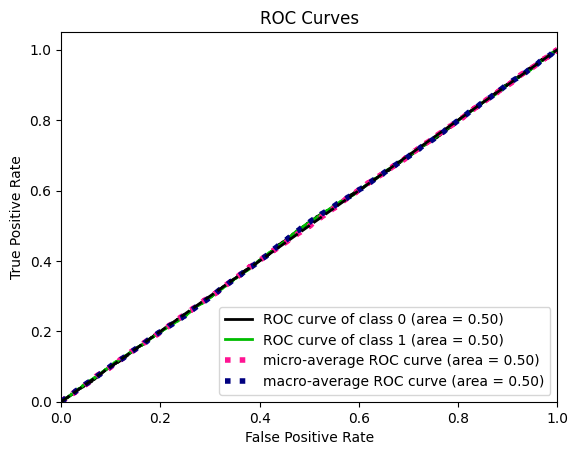

In [67]:
skplt.metrics.plot_roc(y_test,model.predict_proba(X_test))

**Ensemble Learning**

In [68]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting
# we need to give the list of models that we are trying to combine
model.fit(X_train,y_train) # to train all of the models
preds = model.predict(X_test)

In [69]:
y_train_pred=model.predict_proba(X_train)
train_accuracy = roc_auc_score(y_train,y_train_pred[:,-1])
print("AUROC on the train data is:",train_accuracy)

AUROC on the train data is: 0.9910804469587395


In [70]:
print("AUROC on the test data is:",roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

AUROC on the test data is: 0.498023763182829


In [71]:
import collections,numpy
c3=collections.Counter(y_test)
c3

Counter({1: 10046, 0: 9954})

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

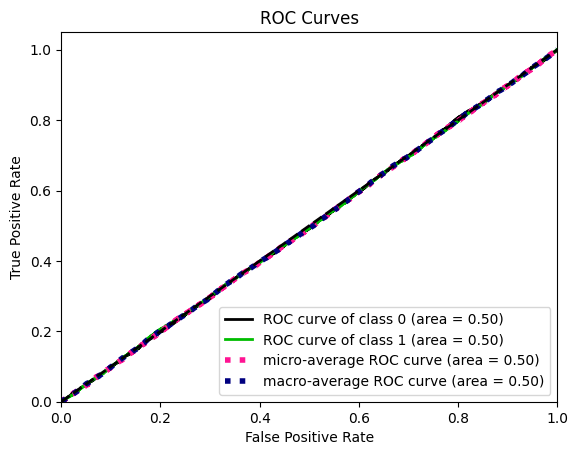

In [72]:
skplt.metrics.plot_roc(y_test,model.predict_proba(X_test))

In [73]:
f1_score(y_test,preds)

0.48748662011315563